In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns
from MCForecastTools import MCSimulation
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
import yfinance as yf

%matplotlib inline

In [2]:
# Load .env environment variables
from dotenv import load_dotenv
load_dotenv()


# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [3]:
# Tickers
ticker = ["DIS", "SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker.head(10)

DIS                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2017-06-12 00:00:00-04:00  105.89  107.08  103.690  107.050  6753315  243.14   
2017-06-13 00:00:00-04:00  107.14  107.26  104.000  104.150  3788305  243.99   
2017-06-14 00:00:00-04:00  104.53  104.59  103.370  103.740  3483352  244.86   
2017-06-15 00:00:00-04:00  103.47  106.07  102.880  105.950  3685768  242.68   
2017-06-16 00:00:00-04:00  106.28  106.35  104.765  105.530  5951970  242.77   
2017-06-19 00:00:00-04:00  105.55  106.00  105.185  105.320  4599893  243.59   
2017-06-20 00:00:00-04:00  105.07  105.30  103.810  103.940  6062295  244.25   
2017-06-21 00:00:00-04:00  101.81  105.08  101.170  104.830  6241070  243.43   
2017-06-22 00:00:00-04:00  104.71  104.77  104.090  104.220  4144135  242.97   
2017-06-23 00:00:00-04:00  103.83  104.58  103.170  104.435  7098910  242.91   

                                                               
                             high       low   close    volume  
time                                                           
2017-06-12 00:00:00-04:00  243.42  242.3800  243.34  57096569  
2017-06-13 00:00:00-04:00  244.61  243.5799  244.52  43470532  
2017-06-14 00:00:00-04:00  244.87  243.2900  244.26  55098826  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243  
2017-06-19 00:00:00-04:00  244.73  243.4800  244.64  42503652  
2017-06-20 00:00:00-04:00  244.26  242.9900  243.04  39203167  
2017-06-21 00:00:00-04:00  243.59  242.4100  242.95  42746920  
2017-06-22 00:00:00-04:00  243.53  242.6400  242.83  32991335  
2017-06-23 00:00:00-04:00  243.51  242.4700  243.16  45792641

In [32]:
# Tickers
ticker = ["SPY", "TSLA", "GDX", "BLCN"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-01", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker.head(10)

BLCN                          GDX                   \
                          open high low close volume   open     high     low   
time                                                                           
2017-06-12 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.75  22.9711  22.680   
2017-06-13 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.61  23.1400  22.600   
2017-06-14 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  23.38  23.4200  22.095   
2017-06-15 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.00  22.3400  21.960   
2017-06-16 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.06  22.1700  21.940   
2017-06-19 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  21.93  22.2050  21.850   
2017-06-20 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  21.96  21.9700  21.750   
2017-06-21 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  21.82  22.1300  21.760   
2017-06-22 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.36  22.5500  22.260   
2017-06-23 00:00:00-04:00  NaN  NaN NaN   NaN    NaN  22.68  22.8100  22.550   

                                                SPY                            \
                            close    volume    open    high       low   close   
time                                                                            
2017-06-12 00:00:00-04:00  22.750  34267374  243.14  243.42  242.3800  243.34   
2017-06-13 00:00:00-04:00  22.970  32647842  243.99  244.61  243.5799  244.52   
2017-06-14 00:00:00-04:00  22.250  71051409  244.86  244.87  243.2900  244.26   
2017-06-15 00:00:00-04:00  22.110  47857414  242.68  243.91  242.3600  243.79   
2017-06-16 00:00:00-04:00  22.050  42827345  242.77  242.83  241.6337  242.63   
2017-06-19 00:00:00-04:00  21.940  29423770  243.59  244.73  243.4800  244.64   
2017-06-20 00:00:00-04:00  21.780  27992466  244.25  244.26  242.9900  243.04   
2017-06-21 00:00:00-04:00  22.110  22767685  243.43  243.59  242.4100  242.95   
2017-06-22 00:00:00-04:00  22.380  32651280  242.97  243.53  242.6400  242.83   
2017-06-23 00:00:00-04:00  22.755  30553191  242.91  243.51  242.4700  243.16   

                                        TSLA                             \
                             volume     open    high      low     close   
time                                                                      
2017-06-12 00:00:00-04:00  57096569  357.990  364.50  350.620  358.9900   
2017-06-13 00:00:00-04:00  43470532  367.670  376.00  366.610  375.9500   
2017-06-14 00:00:00-04:00  55098826  381.085  384.25  376.310  380.6599   
2017-06-15 00:00:00-04:00  51523068  372.500  375.46  366.490  375.3400   
2017-06-16 00:00:00-04:00  48998243  377.780  378.01  370.100  371.4000   
2017-06-19 00:00:00-04:00  42503652  375.000  376.70  367.800  369.8000   
2017-06-20 00:00:00-04:00  39203167  376.670  378.88  369.730  372.2400   
2017-06-21 00:00:00-04:00  42746920  374.350  376.99  368.020  376.4000   
2017-06-22 00:00:00-04:00  32991335  377.990  385.00  373.570  382.6100   
2017-06-23 00:00:00-04:00  45792641  382.450  386.99  379.345  383.2300   

                                     
                             volume  
time                                 
2017-06-12 00:00:00-04:00   8528936  
2017-06-13 00:00:00-04:00   9720070  
2017-06-14 00:00:00-04:00  10303555  
2017-06-15 00:00:00-04:00   8585072  
2017-06-16 00:00:00-04:00   4691654  
2017-06-19 00:00:00-04:00   5034089  
2017-06-20 00:00:00-04:00   5606828  
2017-06-21 00:00:00-04:00   3870166  
2017-06-22 00:00:00-04:00   6198923  
2017-06-23 00:00:00-04:00   4952152

In [4]:
df_ticker.isnull().sum()

DIS  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [5]:
df = df_ticker.dropna()

df.isnull().sum()

DIS  open      0
     high      0
     low       0
     close     0
     volume    0
SPY  open      0
     high      0
     low       0
     close     0
     volume    0
dtype: int64

In [6]:
df.tail()

DIS                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-05-25 00:00:00-04:00  175.60  177.45  175.40  176.20  6335207  420.33   
2021-05-26 00:00:00-04:00  176.71  177.90  176.20  176.48  5652807  418.87   
2021-05-27 00:00:00-04:00  177.24  179.59  176.79  179.14  6408228  420.17   
2021-05-28 00:00:00-04:00  179.56  180.14  178.08  178.72  5850632  420.97   
2021-06-01 00:00:00-04:00  180.24  181.01  178.74  178.86  5688861  422.57   

                                                               
                             high       low   close    volume  
time                                                           
2021-05-25 00:00:00-04:00  420.71  417.6200  418.25  50976308  
2021-05-26 00:00:00-04:00  419.61  417.7600  419.04  38369865  
2021-05-27 00:00:00-04:00  420.72  418.9851  419.69  48411613  
2021-05-28 00:00:00-04:00  421.25  419.7900  420.02  49200328  
2021-06-01 00:00:00-04:00  422.72  419.2000  419.63  47607950

In [7]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices 
df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
df_closing_prices["DIS"] = df_ticker["DIS"]["close"]
#df_closing_prices["BLCN"] = df_ticker["BLCN"]["close"]
#df_closing_prices["SPY"] = df_ticker["SPY"]["close"]
# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.tail()

,SPY,DIS
2021-05-25,-0.002076,0.010785
2021-05-26,0.001889,0.001589
2021-05-27,0.001551,0.015073
2021-05-28,0.000786,-0.002345
2021-06-01,-0.000929,0.000783


In [8]:
df_daily_returns.describe()

,SPY,DIS
count,999.000000,999.000000
mean,0.000632,0.000706
std,0.013136,0.019712
min,-0.116340,-0.129846
25%,-0.003428,-0.007758
50%,0.000967,0.000309
75%,0.006310,0.008449
max,0.094737,0.142840


In [9]:
df_closing_prices.describe()

,SPY,DIS
count,1000.000000,1000.000000
mean,299.952496,125.535751
std,44.430602,25.436715
min,222.510000,85.760000
25%,269.890000,106.137500
50%,287.785000,116.025000
75%,322.872500,137.970000
max,422.090000,201.920000


<AxesSubplot:ylabel='Frequency'>

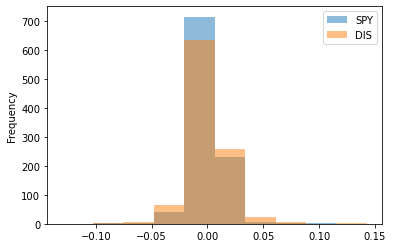

In [10]:
df_daily_returns.plot.hist(alpha=0.5)

<AxesSubplot:ylabel='Density'>

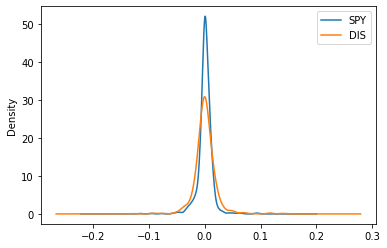

In [11]:
df_daily_returns.plot.density()

<AxesSubplot:>

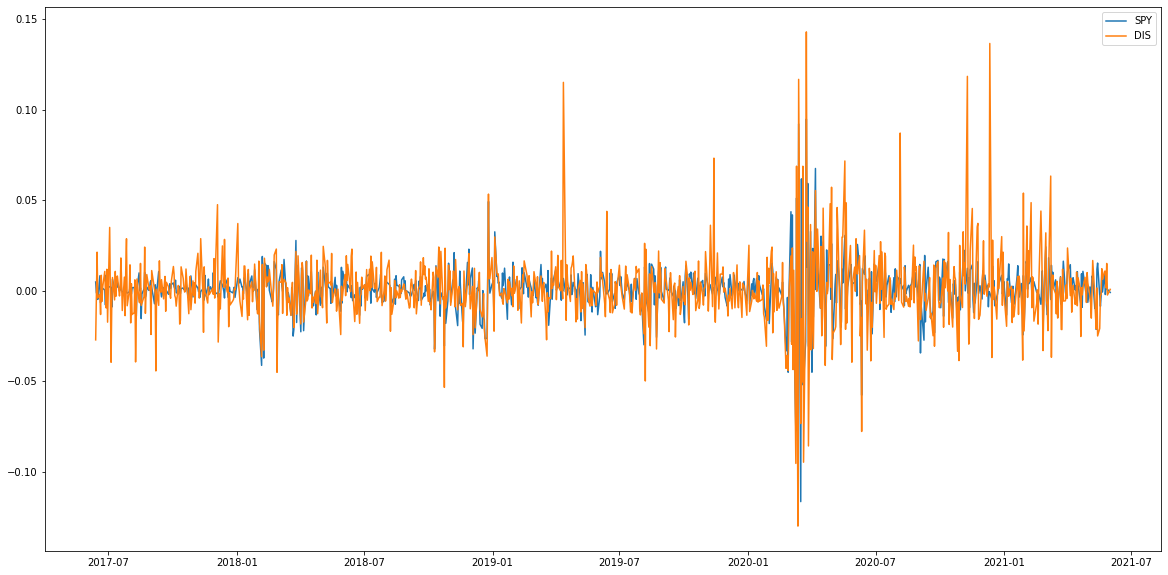

In [13]:
df_daily_returns.plot(figsize = (20,10))

<AxesSubplot:title={'center':'2 different assets'}>

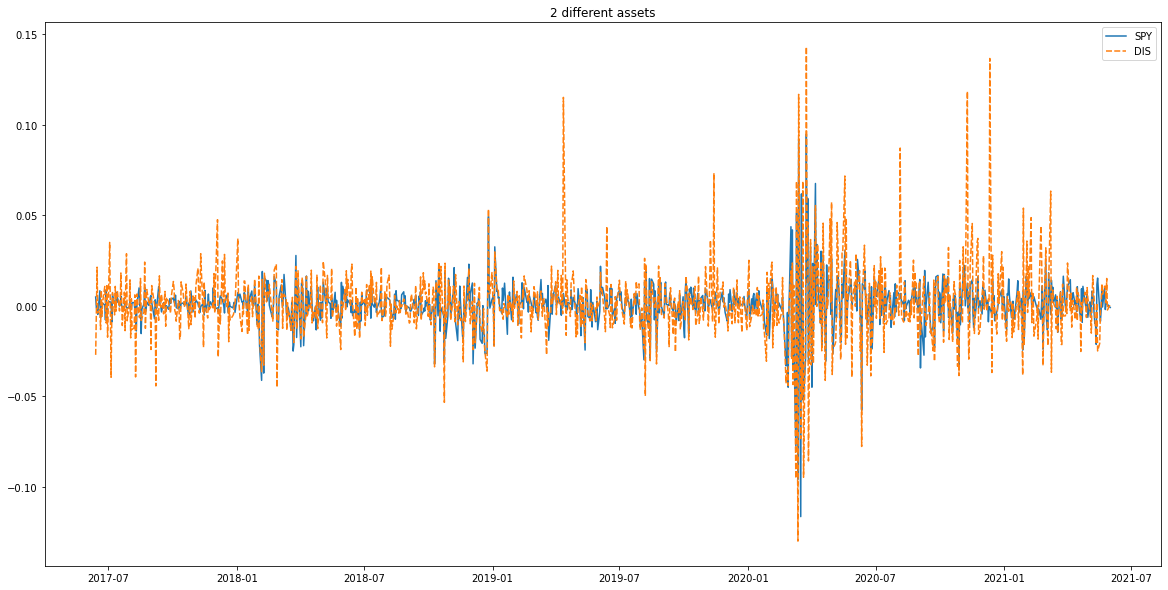

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("2 different assets")

# Line chart showing daily global streams of each song 
sns.lineplot(data=df_daily_returns)

Text(0, 0.5, 'Vertical Label')

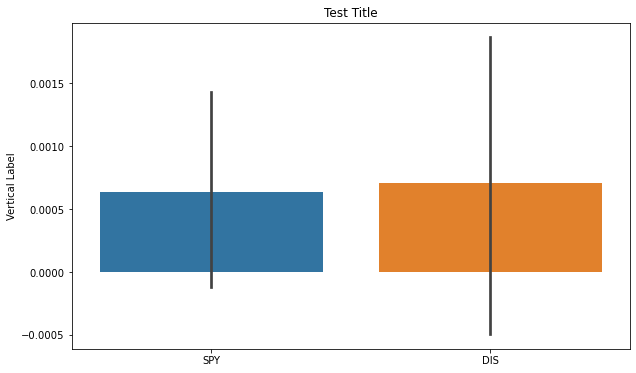

In [15]:
 #Set the width and height of the figure
plt.figure(figsize=(10,6))
 
# Add title
plt.title("Test Title")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(data= df_daily_returns)

# Add label for vertical axis
plt.ylabel("Vertical Label")

Text(0.5, 0, 'Date')

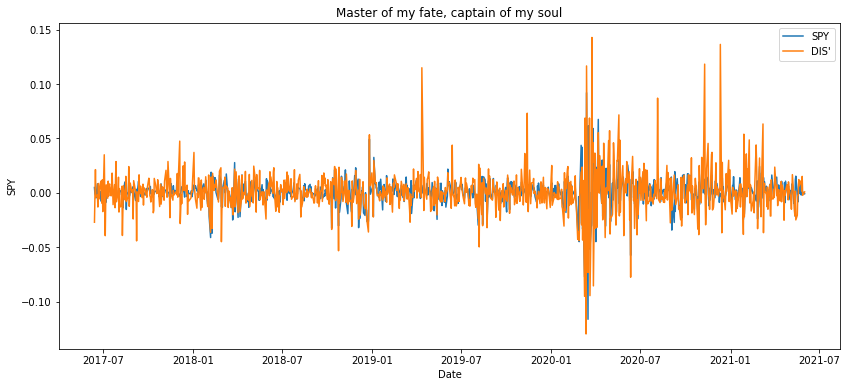

In [16]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Master of my fate, captain of my soul")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=df_daily_returns['SPY'], label="SPY")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=df_daily_returns['DIS'], label="DIS'")

# Add label for horizontal axis
plt.xlabel("Date")

<AxesSubplot:>

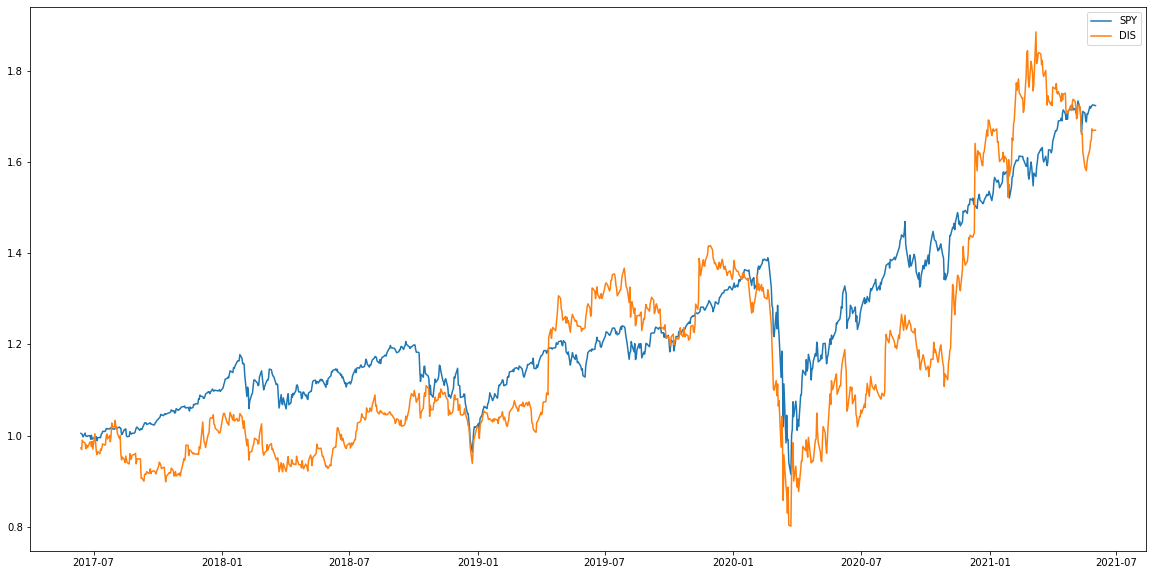

In [17]:
df_daily_returns = (1+ df_daily_returns).cumprod()
df_daily_returns.plot(figsize = (20,10))


<AxesSubplot:>

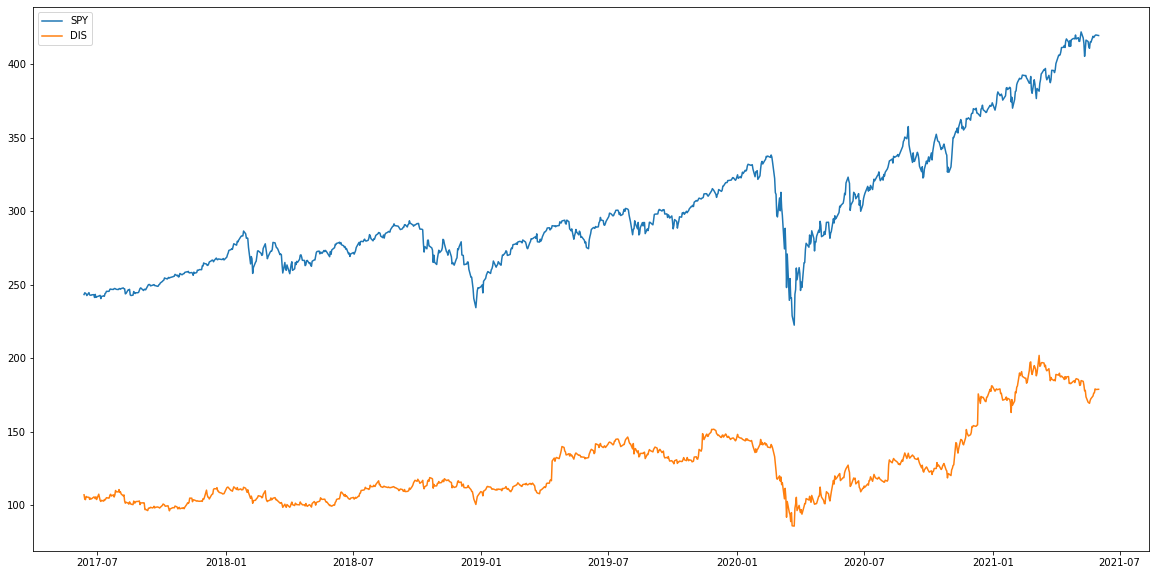

In [18]:
df_closing_prices.plot(figsize = (20,10))

In [19]:
sharpe_ratios = ((df_daily_returns.mean()-df_daily_returns['SPY'].mean()) * 252) / (df_daily_returns.std() * np.sqrt(252))
sharpe_ratios

SPY    0.00000
DIS   -4.00914
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

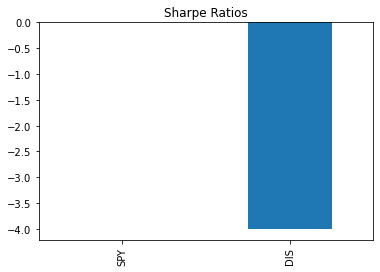

In [20]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [22]:
rolling_dis_covariance = df_daily_returns['DIS'].rolling(window=60).cov(df_daily_returns['SPY'])
rolling_variance = df_daily_returns['SPY'].rolling(window=60).var()
rolling_dis_beta = rolling_dis_covariance / rolling_variance
rolling_dis_beta

2017-06-13         NaN
2017-06-14         NaN
2017-06-15         NaN
2017-06-16         NaN
2017-06-19         NaN
                ...   
2021-05-25   -0.813393
2021-05-26   -0.819477
2021-05-27   -0.835474
2021-05-28   -0.909878
2021-06-01   -0.946513
Length: 999, dtype: float64

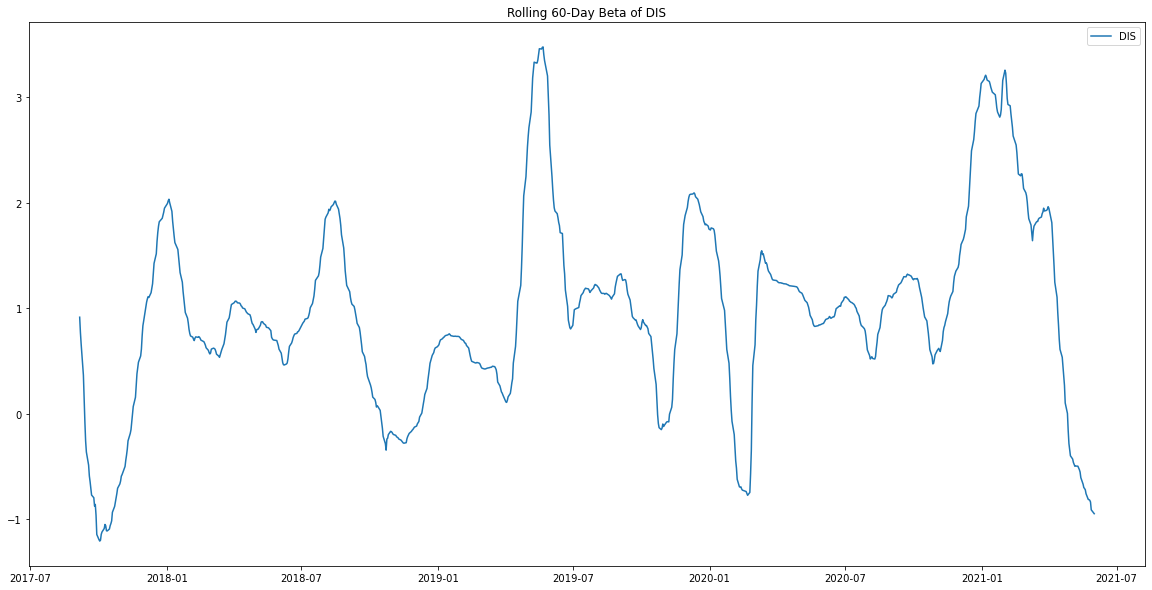

In [23]:
ax = rolling_dis_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of DIS')
ax.legend(["DIS"])

In [24]:
# Tickers
ticker2 = ["DIS"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker2 = alpaca.get_barset(
    ticker2,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker2.head(10)

DIS                                   
                             open     high      low   close   volume
time                                                                
2017-06-05 00:00:00-04:00  104.63  106.875  103.720  106.51  5302320
2017-06-06 00:00:00-04:00  106.17  106.190  104.610  105.51  8287158
2017-06-07 00:00:00-04:00  105.79  106.250  103.430  103.52  4621500
2017-06-08 00:00:00-04:00  103.19  104.490  101.800  104.32  8839933
2017-06-09 00:00:00-04:00  104.29  105.920  104.080  105.62  7628117
2017-06-12 00:00:00-04:00  105.89  107.080  103.690  107.05  6753315
2017-06-13 00:00:00-04:00  107.14  107.260  104.000  104.15  3788305
2017-06-14 00:00:00-04:00  104.53  104.590  103.370  103.74  3483352
2017-06-15 00:00:00-04:00  103.47  106.070  102.880  105.95  3685768
2017-06-16 00:00:00-04:00  106.28  106.350  104.765  105.53  5951970

In [25]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker2,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [26]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992382,1.022513,0.967925,0.933567,0.989828,1.017378,1.004928,0.997521,0.991590,1.020587,...,1.023297,1.012323,0.971385,0.989650,0.990089,1.004286,1.019214,0.967096,1.023516,1.022882
2,1.000415,1.017598,0.941223,0.959722,0.972874,1.029940,1.010705,1.019671,0.986330,1.025232,...,1.018740,1.017713,0.958678,0.996135,0.956759,1.015722,1.034119,0.991305,1.013704,1.012032
3,0.984661,1.031798,0.920790,0.952572,0.955643,1.043272,1.002113,1.017376,0.979325,1.042232,...,1.012382,1.018692,0.968374,0.964547,0.955644,1.022125,1.029942,0.974336,1.011214,1.010171
4,1.012581,1.052919,0.912016,0.952441,0.940058,1.022813,1.023482,1.033085,0.967871,1.033166,...,1.028788,0.998429,0.995603,0.969175,0.933969,1.043675,1.000142,0.970409,1.022095,1.006579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.524237,4.973663,1.708993,4.802881,1.438765,0.897560,1.115742,2.744927,3.526893,4.580937,...,0.746591,1.788385,3.085721,2.438729,0.886020,4.545401,3.008772,1.757650,1.072965,2.283934
1257,4.723556,4.857011,1.706821,4.760988,1.427298,0.899066,1.148487,2.709167,3.660443,4.694231,...,0.737715,1.772564,3.023237,2.399747,0.906447,4.433422,3.003478,1.772296,1.057736,2.303184
1258,4.750029,5.124644,1.715771,4.710954,1.476636,0.899505,1.152289,2.756489,3.656995,4.620497,...,0.730930,1.757972,2.945959,2.411555,0.897233,4.543700,3.020412,1.763289,1.094956,2.345107
1259,4.814228,5.067938,1.738682,4.795419,1.488462,0.902859,1.165828,2.756352,3.653215,4.587135,...,0.743435,1.783816,2.936064,2.383441,0.924204,4.730825,3.034202,1.793266,1.108036,2.374515


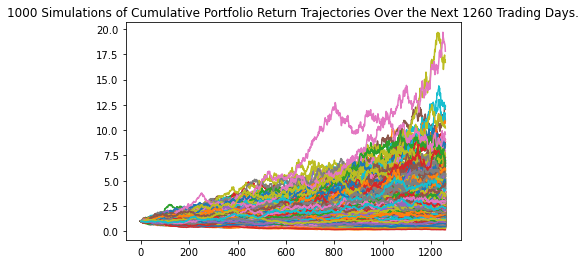

In [28]:
line_plot = MC_fiveyear.plot_simulation()

In [30]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000401,1.000737,0.933567,1.059612
2,1.001147,1.001579,0.912523,1.093589
3,1.001044,1.000411,0.895469,1.102592
4,1.001534,1.000095,0.881180,1.140357


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of DIS Stock Over the Next Year'}>

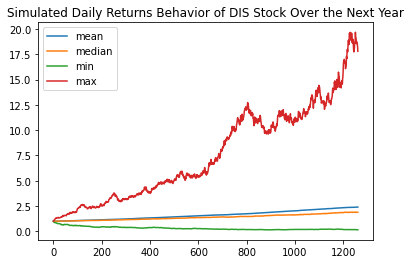

In [31]:
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of DIS Stock Over the Next Year")

In [32]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10004.012313,10007.366280,9335.671780,10596.124986
2,10011.473479,10015.790777,9125.225249,10935.888944
3,10010.436118,10004.114617,8954.688076,11025.923800
4,10015.339064,10000.953918,8811.802097,11403.571903


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of DIS Stock Over the Next Year'}>

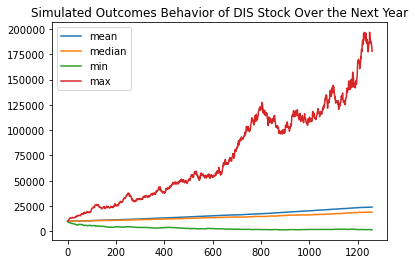

In [33]:
cumulative_pnl.plot(title="Simulated Outcomes Behavior of DIS Stock Over the Next Year")

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean               2.400220
std                1.854198
min                0.160299
25%                1.161468
50%                1.890775
75%                3.080026
max               17.807996
95% CI Lower       0.474123
95% CI Upper       6.837297
Name: 1260, dtype: float64


In [35]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $4741.23 and $68372.97.


In [36]:
# Tickers
ticker3 = ["SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# # Get 5 year's worth of historical data for Tesla, GDX, BLCN, SPX
df_ticker3 = alpaca.get_barset(
    ticker3,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
df_ticker3.head(10)

SPY                                      
                             open    high       low    close     volume
time                                                                   
2017-06-05 00:00:00-04:00  243.98  244.30  243.7600  243.965   27596403
2017-06-06 00:00:00-04:00  243.31  243.98  243.1200  243.250   36562468
2017-06-07 00:00:00-04:00  243.60  243.92  242.8300  243.650   38602639
2017-06-08 00:00:00-04:00  243.77  244.33  243.1700  243.760   48051333
2017-06-09 00:00:00-04:00  244.09  245.01  241.9500  243.450  103578275
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.340   57096569
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.520   43470532
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.260   55098826
2017-06-15 00:00:00-04:00  242.68  243.91  242.3600  243.790   51523068
2017-06-16 00:00:00-04:00  242.77  242.83  241.6337  242.630   48998243

In [37]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
MC_fiveyear2 = MCSimulation(
    portfolio_data = df_ticker3,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [38]:
MC_fiveyear2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999512,1.000940,1.006951,1.016387,1.021409,0.988675,1.010131,0.968016,0.993965,1.001567,...,0.998758,0.986404,1.011925,0.990688,1.015805,1.001915,1.003255,1.008568,0.988003,1.002649
2,1.010745,0.982963,1.009277,1.026015,1.022535,1.006396,1.005262,0.968413,0.982941,1.002306,...,1.013106,0.989377,0.998537,1.003520,1.044322,1.009880,1.023646,1.017079,0.972589,0.976967
3,1.004403,0.984159,1.017743,1.031389,1.028030,0.991830,1.019324,0.998542,0.984152,0.985686,...,1.007639,0.989325,1.018638,1.008254,1.064454,1.005379,1.030120,0.983685,0.964892,0.978340
4,1.002845,0.978570,1.009189,1.044340,1.007167,0.990519,1.031545,0.987662,0.990623,0.982234,...,1.010753,1.000160,1.034950,0.990501,1.075812,1.022151,1.042902,0.997830,0.990316,0.995204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,4.594169,2.241804,1.052151,1.414414,3.115323,4.147616,1.811176,1.771770,2.040931,2.257007,...,3.273472,1.331133,1.333167,2.400941,2.118351,2.283169,2.282112,1.519237,1.037812,1.601687
1257,4.491991,2.324991,1.052425,1.423079,3.122890,4.042353,1.774558,1.765207,2.038857,2.247218,...,3.328897,1.329375,1.346666,2.415004,2.119671,2.271122,2.237573,1.524750,1.038969,1.609074
1258,4.454197,2.319232,1.055847,1.423155,3.178452,4.034169,1.789880,1.735859,2.018412,2.291648,...,3.384095,1.317431,1.359001,2.352298,2.127164,2.282007,2.262782,1.532353,1.054434,1.602016
1259,4.476828,2.322519,1.082231,1.439135,3.251340,4.158827,1.795788,1.734121,2.043911,2.294160,...,3.271010,1.321027,1.395496,2.336238,2.086262,2.248628,2.249070,1.547405,1.033448,1.599712


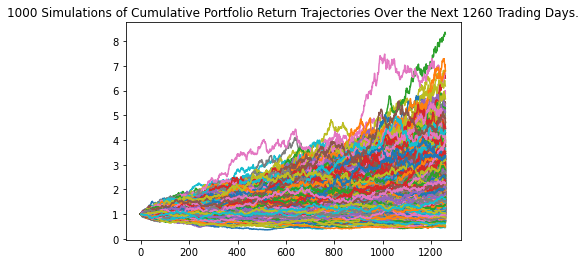

In [39]:
line_plot2 = MC_fiveyear2.plot_simulation()

In [40]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data2 = {
    "mean": list(MC_fiveyear2.simulated_return.mean(axis=1)),
    "median": list(MC_fiveyear2.simulated_return.median(axis=1)),
    "min": list(MC_fiveyear2.simulated_return.min(axis=1)),
    "max": list(MC_fiveyear2.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns2 = pd.DataFrame(simulated_returns_data2)

# Display sample data
df_simulated_returns2.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000503,1.000640,0.952935,1.037894
2,1.001030,1.001227,0.936605,1.059626
3,1.001608,1.000920,0.930668,1.077753
4,1.002399,1.000651,0.904166,1.095172


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of SPY Stock Over the Next 5 Years'}>

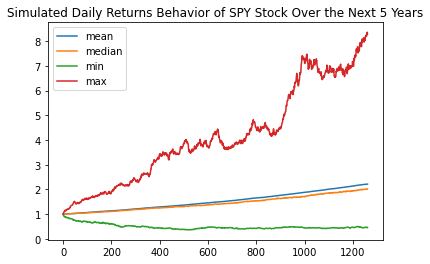

In [41]:
df_simulated_returns2.plot(title="Simulated Daily Returns Behavior of SPY Stock Over the Next 5 Years")

In [42]:
# Set initial investment
initial_investment2 = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl2 = initial_investment2 * df_simulated_returns2

# Display sample data
cumulative_pnl2.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10005.030665,10006.403333,9529.348473,10378.942401
2,10010.301200,10012.266277,9366.050306,10596.256689
3,10016.076279,10009.197199,9306.683800,10777.533785
4,10023.985407,10006.511748,9041.659154,10951.724447


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of SPY Stock Over the Next Year'}>

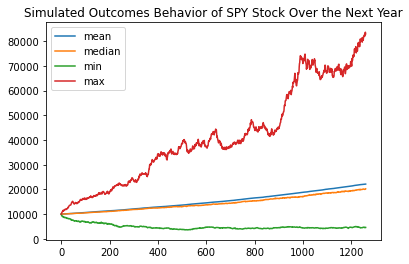

In [43]:
cumulative_pnl2.plot(title="Simulated Outcomes Behavior of SPY Stock Over the Next Year")

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_fiveyear2.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           1000.000000
mean               2.215488
std                1.055287
min                0.462203
25%                1.461284
50%                2.021167
75%                2.758134
max                8.300727
95% CI Lower       0.778415
95% CI Upper       4.735066
Name: 1260, dtype: float64


In [45]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
ci_lower2 = round(tbl2[8]*10000,2)
ci_upper2 = round(tbl2[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $7784.15 and $47350.66.


<AxesSubplot:>

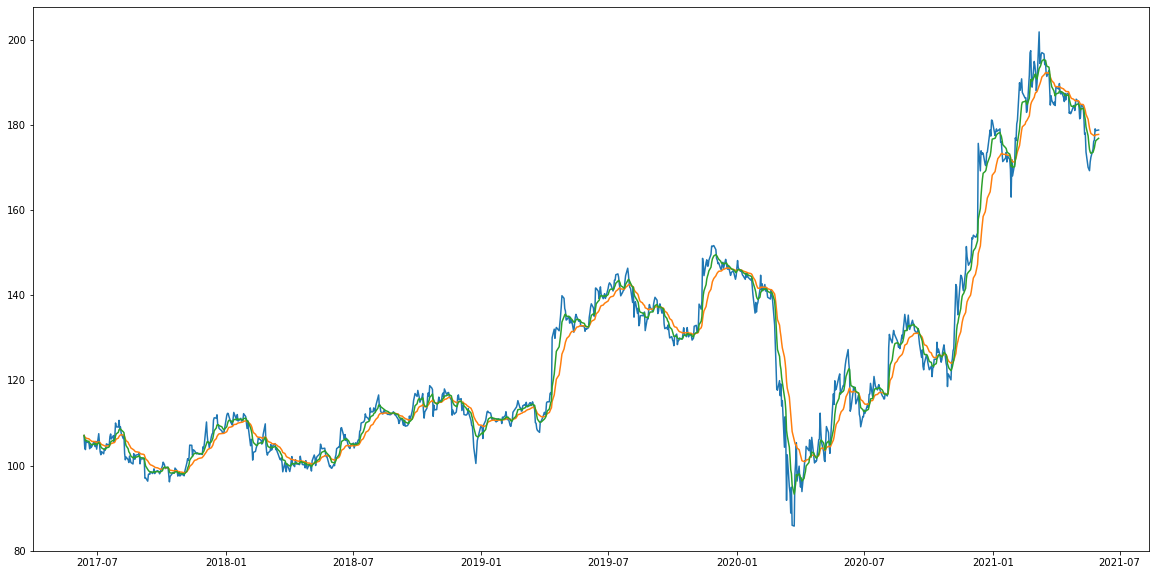

In [46]:
dis_21_ema = df_closing_prices['DIS'].ewm(span=21, adjust=False).mean()
dis_8_ema = df_closing_prices['DIS'].ewm(span=8, adjust=False).mean()
df_closing_prices['DIS'].plot(figsize = (20,10))
dis_21_ema.plot(figsize = (20,10))
dis_8_ema.plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

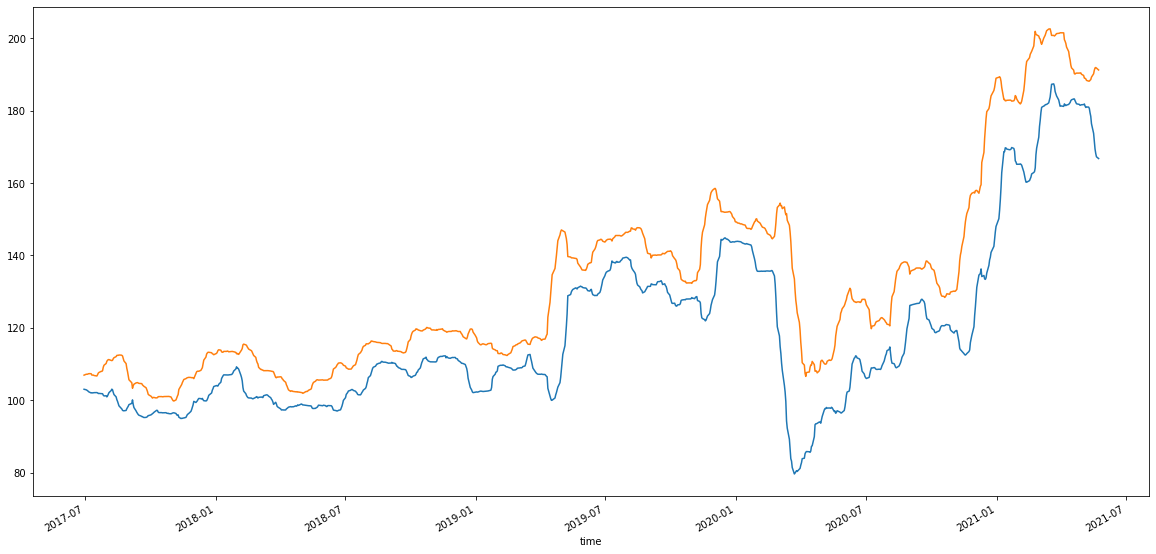

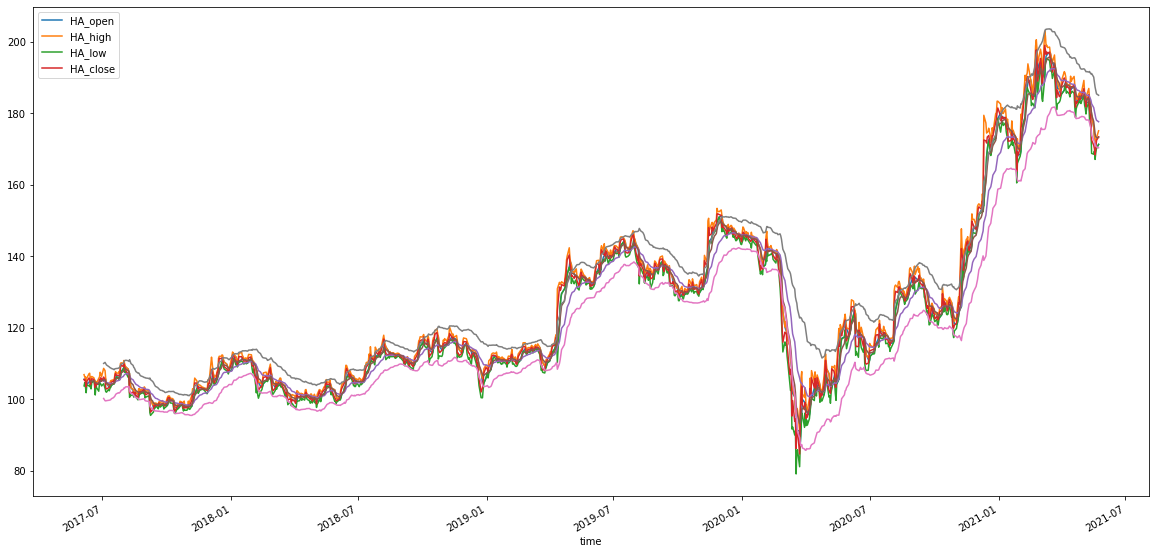

In [47]:
ema21_ohlc4 = ta.ema(ta.ohlc4(df_ticker2['DIS']["open"], df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(df_ticker2['DIS']["open"], df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles = ta.ha(df_ticker2['DIS']["open"], df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"], offset=None)
bbands = ta.bbands(df_ticker2['DIS']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1.5, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(df_ticker2['DIS']["high"], df_ticker2['DIS']["low"], df_ticker2['DIS']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(df_ticker2['DIS']["high"], df_ticker2['DIS']["low"],  df_ticker2['DIS']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles.plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))


<AxesSubplot:xlabel='time'>

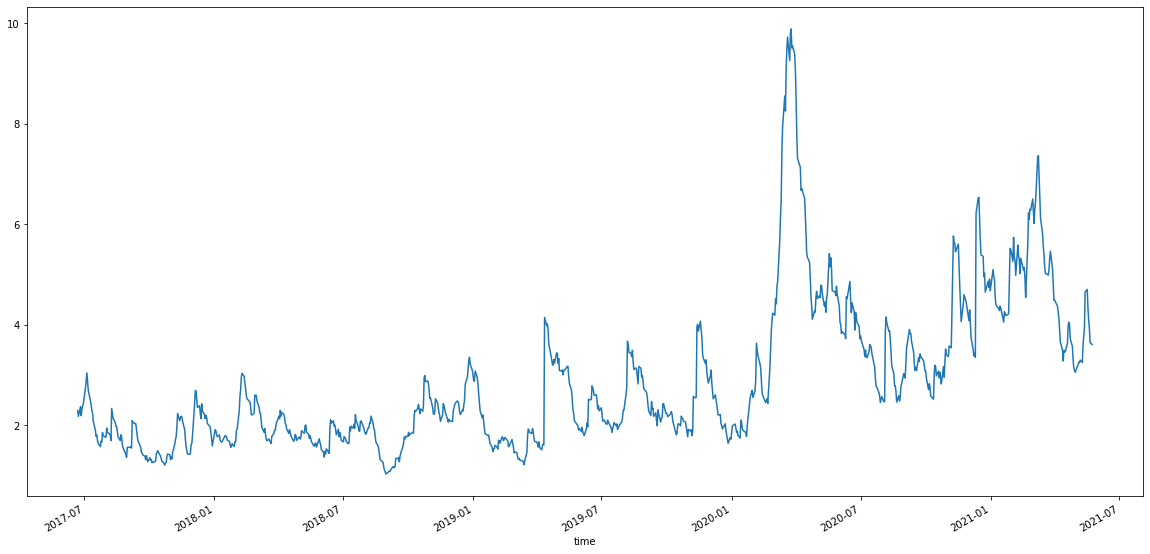

In [48]:
tr.plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

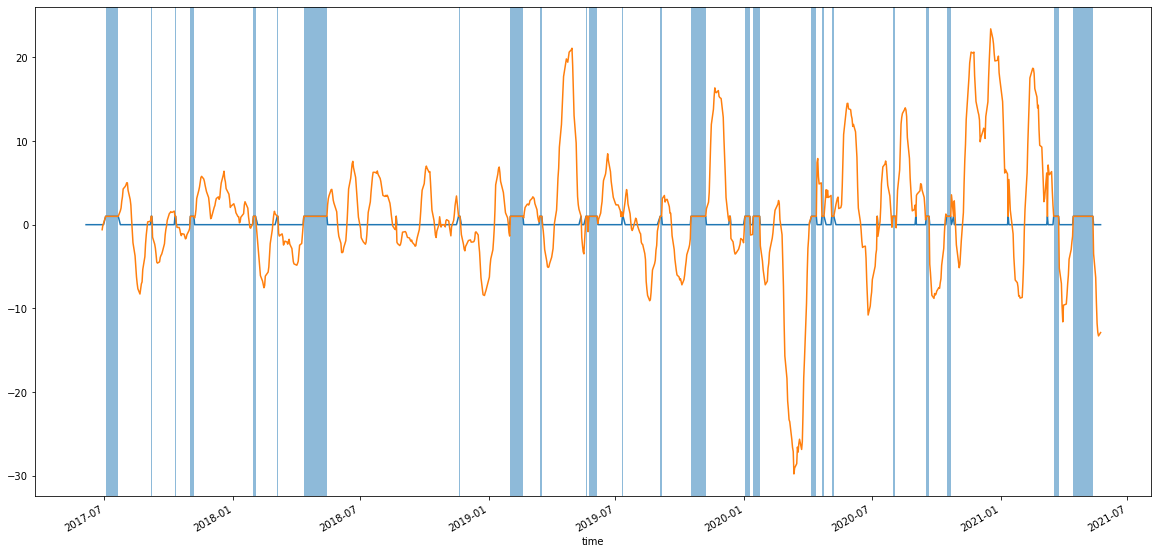

In [49]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(df_ticker2['DIS'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(df_ticker2['DIS'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))

#squeeze['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))
#squeeze['SQZ_ON'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

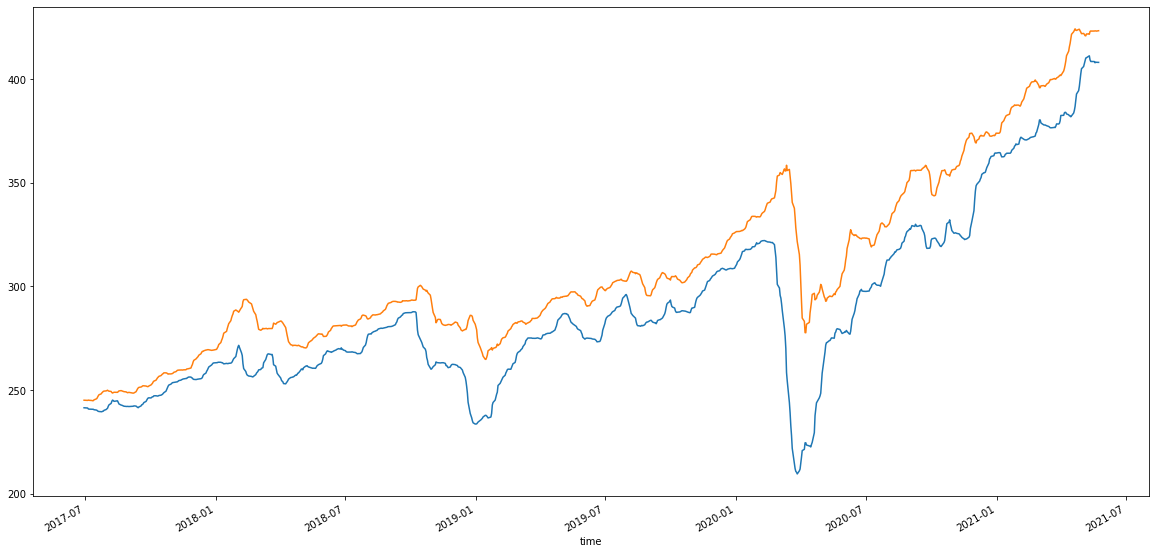

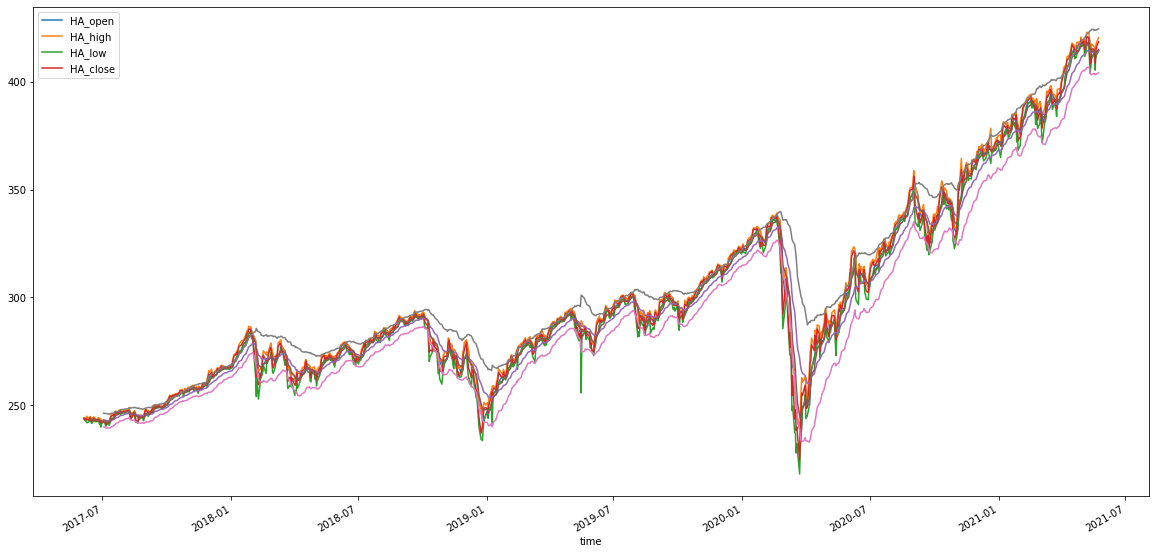

In [50]:
ema21_ohlc4_2 = ta.ema(ta.ohlc4(df_ticker3['SPY']["open"], df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"]), length=21)
ema08_ohlc4_2 = ta.ema(ta.ohlc4(df_ticker3['SPY']["open"], df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"]), length=8)
#df_closing_prices['DIS'].plot(figsize = (20,10))
candles2 = ta.ha(df_ticker3['SPY']["open"], df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"], offset=None)
bbands2 = ta.bbands(df_ticker3['SPY']["close"], length=20, std=None, mamode=None, offset=None)
squeeze2 = ta.squeeze(df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=1.5, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr2 = ta.atr(df_ticker3['SPY']["high"], df_ticker3['SPY']["low"], df_ticker3['SPY']["close"], length=14, mamode="ema", drift=1, offset=0)
kc2 = ta.kc(df_ticker3['SPY']["high"], df_ticker3['SPY']["low"],  df_ticker3['SPY']["close"], length=21, scalar=2, mamode='ema', offset=0)

fig = plt.figure()
bbands2['BBL_20_2.0'].plot(figsize = (20,10))
bbands2['BBU_20_2.0'].plot(figsize = (20,10))
candles2.plot(figsize = (20,10))
ema21_ohlc4_2.plot(figsize = (20,10))
ema08_ohlc4_2.plot(figsize = (20,10))
kc2['KCLe_21_2.0'].plot(figsize = (20,10))
kc2['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

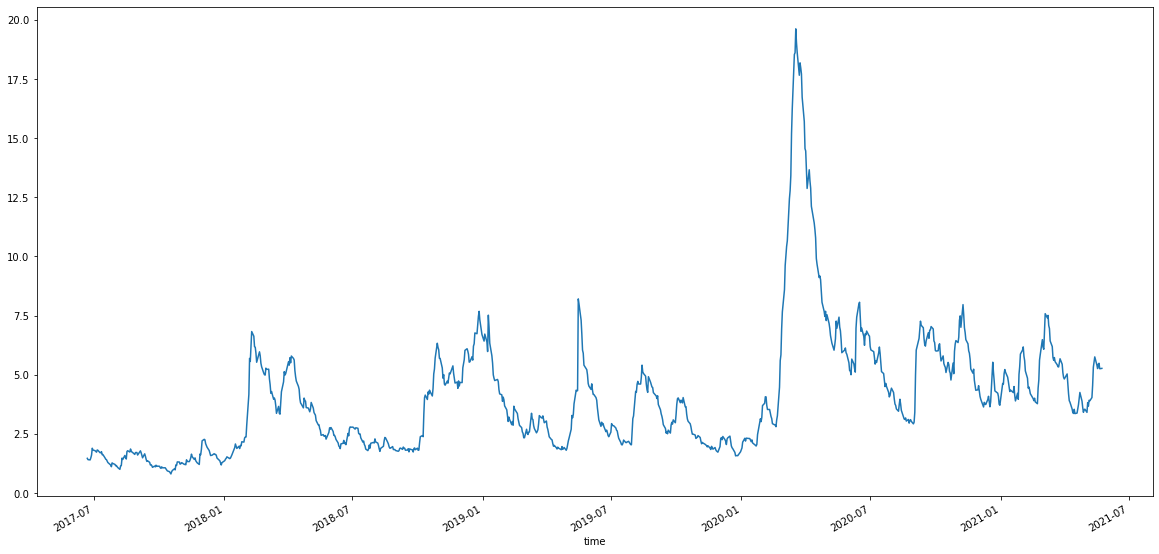

In [51]:
tr2.plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

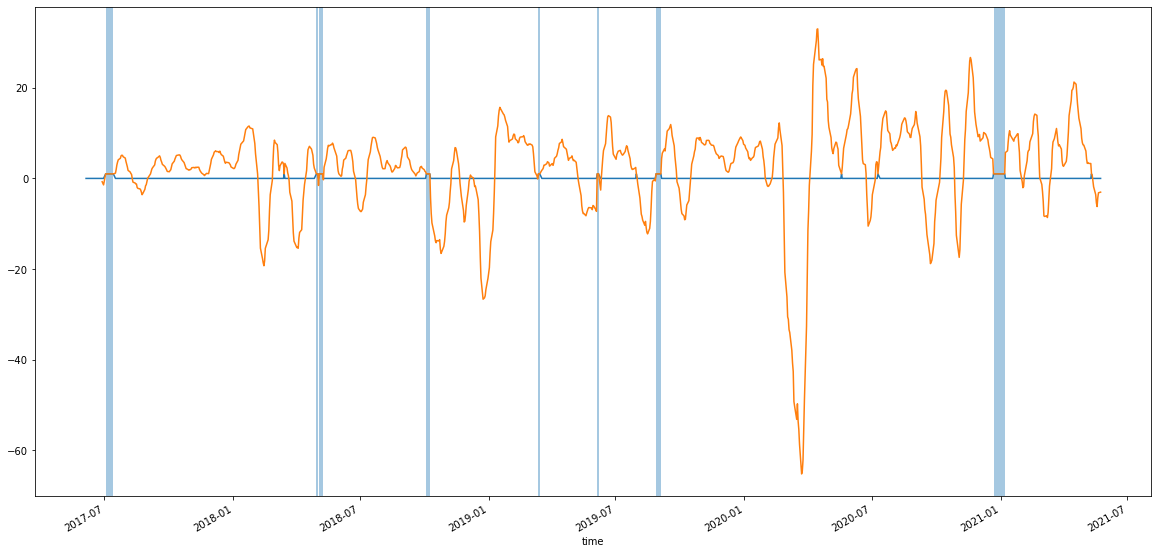

In [52]:
squeeze2[squeeze2['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(df_ticker3['SPY'].index, 0, 1, where=squeeze2['SQZ_ON'], alpha=0.4, transform=ax.get_xaxis_transform())
squeeze_on = plt.plot(df_ticker3['SPY'].index,squeeze2['SQZ_ON'])
squeeze_on

squeeze2['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))
#squeeze2['SQZ_ON'].plot(figsize = (20,10))

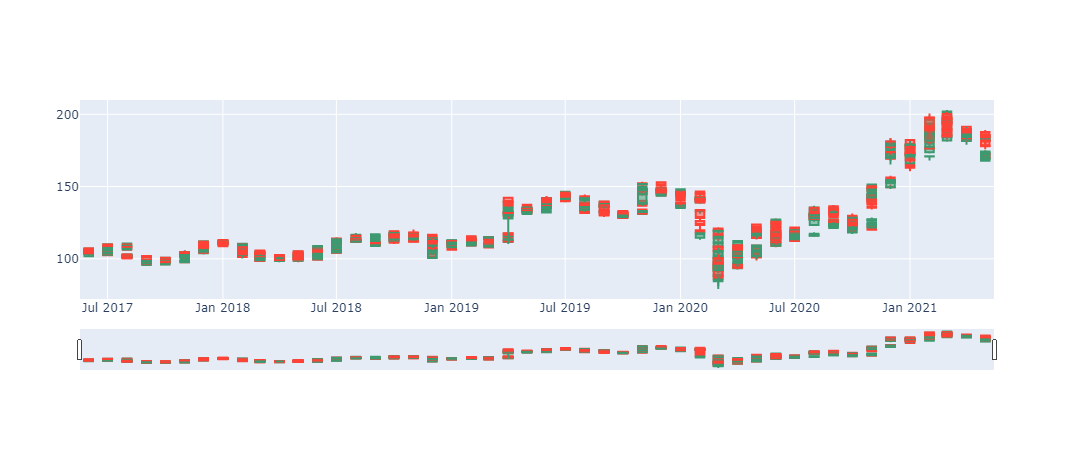

In [56]:
fig = go.Figure(data=[go.Candlestick(x=df_ticker2['DIS'].index,
                open=df_ticker2['DIS']['open'],
                high=df_ticker2['DIS']['high'],
                low=df_ticker2['DIS']['low'],
                close=df_ticker2['DIS']['close'])])


fig.show()

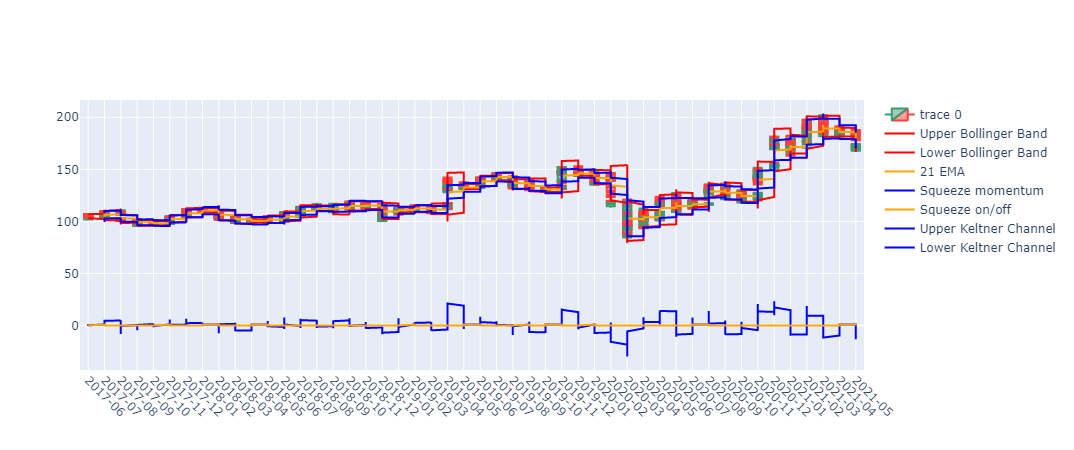

In [67]:
df_ticker2.index = pd.to_datetime(df_ticker2.index, format = '%Y/%m').strftime('%Y-%m')
candlestick = go.Candlestick(x=df_ticker2['DIS'].index, open=df_ticker2['DIS']['open'], high=df_ticker2['DIS']['high'], low=df_ticker2['DIS']['low'],
                close=df_ticker2['DIS']['close'])
upper_band = go.Scatter(x=df_ticker2['DIS'].index, y=bbands['BBU_20_2.0'], name='Upper Bollinger Band', line={'color': 'red'})
lower_band = go.Scatter(x=df_ticker2['DIS'].index, y=bbands['BBL_20_2.0'], name='Lower Bollinger Band', line={'color': 'red'})
ema21_dis = go.Scatter(x=df_ticker2['DIS'].index, y=ema21_ohlc4, name='21 EMA', line={'color': 'orange'})
squeeze_plot = go.Scatter(x=df_ticker2['DIS'].index, y=squeeze['SQZ_20_2.0_21_1.5'], name='Squeeze momentum', line={'color': 'blue'})
squeeze_fire = go.Scatter(x=df_ticker2['DIS'].index, y=squeeze['SQZ_ON'], name='Squeeze on/off', line={'color': 'orange'})
upper_keltner = go.Scatter(x=df_ticker2['DIS'].index, y=kc['KCUe_21_2.0'], name='Upper Keltner Channel', line={'color': 'blue'})
lower_keltner = go.Scatter(x=df_ticker2['DIS'].index, y=kc['KCLe_21_2.0'], name='Lower Keltner Channel', line={'color': 'blue'})


fig = go.Figure(data=[candlestick, upper_band, lower_band, ema21_dis, squeeze_plot, squeeze_fire, upper_keltner, lower_keltner])
fig.layout.xaxis.type = 'category'
fig.layout.xaxis.rangeslider.visible = False
fig.update_xaxes(tickangle=45)
fig.show()

#squeeze['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))
#squeeze['SQZ_ON'].plot(figsize = (20,10))

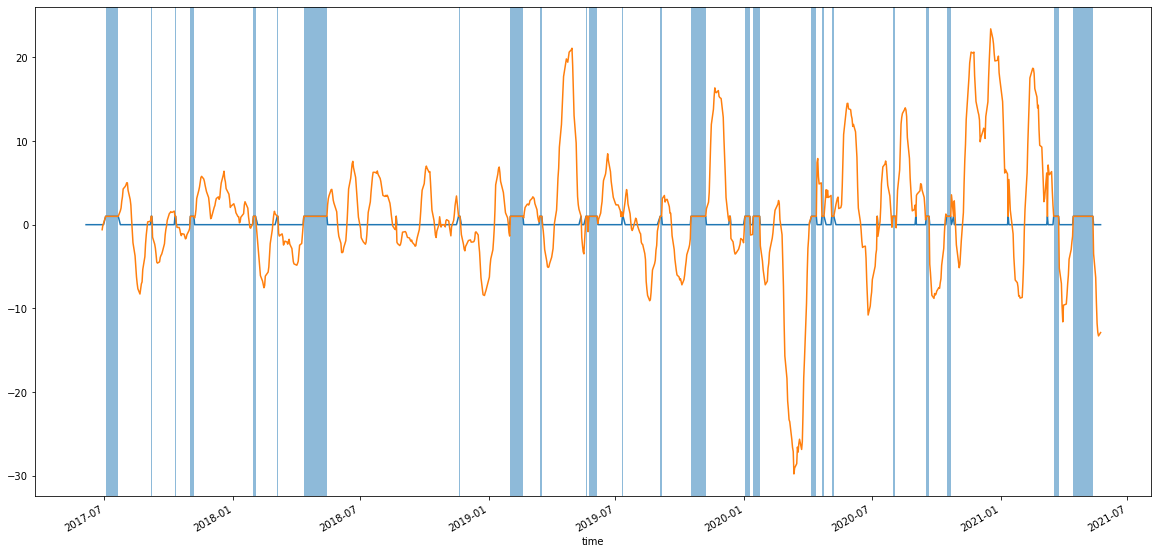

In [61]:
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(df_ticker2['DIS'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(df_ticker2['DIS'].index, squeeze['SQZ_ON'])

sqz = squeeze['SQZ_20_2.0_21_1.5'].plot(figsize = (20,10))


In [51]:
df_ticker2['DIS'].index

DatetimeIndex(['2017-06-05 00:00:00-04:00', '2017-06-06 00:00:00-04:00',
               '2017-06-07 00:00:00-04:00', '2017-06-08 00:00:00-04:00',
               '2017-06-09 00:00:00-04:00', '2017-06-12 00:00:00-04:00',
               '2017-06-13 00:00:00-04:00', '2017-06-14 00:00:00-04:00',
               '2017-06-15 00:00:00-04:00', '2017-06-16 00:00:00-04:00',
               ...
               '2021-05-11 00:00:00-04:00', '2021-05-12 00:00:00-04:00',
               '2021-05-13 00:00:00-04:00', '2021-05-14 00:00:00-04:00',
               '2021-05-17 00:00:00-04:00', '2021-05-18 00:00:00-04:00',
               '2021-05-19 00:00:00-04:00', '2021-05-20 00:00:00-04:00',
               '2021-05-21 00:00:00-04:00', '2021-05-24 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='time', length=1000, freq=None)

In [72]:
help(ta.kc)

Help on function kc in module pandas_ta.volatility.kc:

kc(high, low, close, length=None, scalar=None, mamode=None, offset=None, **kwargs)
    Keltner Channels (KC)
    
    A popular volatility indicator similar to Bollinger Bands and
    Donchian Channels.
    
    Sources:
        https://www.tradingview.com/wiki/Keltner_Channels_(KC)
    
    Calculation:
        Default Inputs:
            length=20, scalar=2, mamode=None, tr=True
        TR = True Range
        SMA = Simple Moving Average
        EMA = Exponential Moving Average
    
        if tr:
            RANGE = TR(high, low, close)
        else:
            RANGE = high - low
    
        if mamode == "ema":
            BASIS = sma(close, length)
            BAND = sma(RANGE, length)
        elif mamode == "sma":
            BASIS = sma(close, length)
            BAND = sma(RANGE, length)
    
        LOWER = BASIS - scalar * BAND
        UPPER = BASIS + scalar * BAND
    
    Args:
        high (pd.Series): Series of 'hig